# RAIN AUSTRALIA PREDICTION

# PROBLEM STATEMENT

Rain prediction is a critical aspect of weather forecasting that impacts various industries such as agriculture, transportation, and urban planning. Traditional meteorological models often struggle to provide accurate rain forecasts due to the complex interplay of weather attributes such as MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, and RainTomorrow.

The goal of this data science project is to develop a machine learning-based rain prediction model that leverages historical weather data and these attributes to accurately predict rain occurrence (RainToday) and rain occurrence for the next day (RainTomorrow). The project will involve exploring and analyzing various feature , selecting appropriate machine learning algorithms, and optimizing model performance to achieve the highest possible accuracy in rain prediction. The successful implementation of such a model would have significant implications for improving decision-making in agriculture, transportation, and urban planning, and enabling stakeholders to make informed choices based on reliable rain prediction information.

This project is another simple approach, which helps predicting of rain occurrence using 22 characteristics: 

*MinTemp: Minimum recorded temperature (°C)
*MaxTemp: Maximum recorded temperature (°C)
*Rainfall: Amount of rainfall (mm)
*Evaporation: Water evaporation (mm)
*Sunshine: Hours of sunshine
*WindGustSpeed: Maximum wind gust speed (km/h)
*WindSpeed9am: Average wind speed at 9 a.m. (km/h)
*WindSpeed3pm: Average wind speed at 3 p.m. (km/h)
*Humidity9am: Relative humidity at 9 a.m. (%)
*Humidity3pm: Relative humidity at 3 p.m. (%)
*Pressure9am: Atmospheric pressure at 9 a.m. (hPa)
*Pressure3pm: Atmospheric pressure at 3 p.m. (hPa)
*Cloud9am: Cloud cover at 9 a.m. (oktas)
*Cloud3pm: Cloud cover at 3 p.m. (oktas)
*Temp9am: Temperature at 9 a.m. (°C)
*Temp3pm: Temperature at 3 p.m. (°C)
*RainToday: Whether rain occurred today (Yes/No)
*RainTomorrow: Whether rain will occur tomorrow (Yes/No)

# SOURCES

You can downloaded from this address:https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

# PROBLEM APPROACH

**The type of dataset and problem is a classic supervised binary classification**

With 768 elements all with certain attributes, we want to build a machine learning model to identify people affected by type 2 diabetes.
To solve the problem we will have to: firstly, inspect the data then cleaning it, do any required transformation and normalisation, apply a machine learning algorithms and using cross validation; after finding the best model, we train it, reset parameter, especially in this project, since the Logistic Regression is the best model, we modify it threshold and choosing which penalty (Ridge/Lasso) is most efficient advoid overfitting. Then check the performance of the final model with a 'made-up' information.

# OUTLINE

***I) DATA INSPECTION:***

1) IMPORT LIBRARIES AND DATASET

2) GENERAL DESCRIPTION

3) VISUALIZATION OF DATASET

***II) DATA CLEANING AND TRANSFORMATION***

1) DEALING WITH NULL VALUE

2) DEALING WITH OUTLIERS

3) FEATURE SCALING

***III) TESTING MULTIPLE MODELS***

1) SPLITTING THE DATASET

2) BUILDING AND TESTING MODEL

***IV) BUILDING THE BEST MODEL FOR PREDICTION***

1) ANALYSIS OF 2 MODELS: CONFUSION MATRIX AND CLASSIFICATION REPORT

2) FINDING THE BEST MODEL:

A- LINEAR DISCRIMINANT ANALYSIS

B- LOGISTIC REGRESSION: a) Avoid Overfitting with penalty, b) Best parameter

3) APPLY NEW PARAMETER AND TRAIN IT

4) MODIFY THE THRESHOLD

***V) MAKE PREDICTION***

***VI) CONCLUSION***

# I) DATA INSPECTION

1) IMPORT LIBRARIES USED AND THE PIMA INDIAN DIABETES TYPE 2 DATASET

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
rain_df = pd.read_csv('weatherAUS.csv')

In [3]:
#Showing the dataframe
rain_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


2) SHAPE OF DATA AND GENERAL DESCRIPTIONS

In [4]:
rain_df.shape

(145460, 23)

In [5]:
mapping = {"Yes": 1, "No": 0}

rain_df.replace(mapping, inplace=True)

In [6]:
#(768,9) means dataset includes 768 datapoints with 9 features (attributes)
#The last attribute ('outcome') is the target column (supervised label)

In [7]:
#Data general statistical numbers
rain_stats=rain_df.describe().round(decimals=2)
rain_stats

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00,142199.00,142193.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68,0.22,0.22
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94,0.42,0.42
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40,0.00,0.00
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60,0.00,0.00
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10,0.00,0.00
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40,0.00,0.00
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,1.00,1.00


As we can see from the table, the number of attribute vectors, their mean, standard deviation, minimum/maximum, 1st-2nd-3rd quartiles

In [8]:
#Data Correlation matrix
cor_matrix=rain_df.corr().round(decimals=2)
cor_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.00,0.74,0.10,0.47,0.07,0.18,0.18,0.18,-0.23,0.01,-0.45,-0.46,0.08,0.02,0.90,0.71,0.06,0.08
MaxTemp,0.74,1.00,-0.07,0.59,0.47,0.07,0.01,0.05,-0.50,-0.51,-0.33,-0.43,-0.29,-0.28,0.89,0.98,-0.23,-0.16
Rainfall,0.10,-0.07,1.00,-0.06,-0.23,0.13,0.09,0.06,0.22,0.26,-0.17,-0.13,0.20,0.17,0.01,-0.08,0.50,0.24
Evaporation,0.47,0.59,-0.06,1.00,0.37,0.20,0.19,0.13,-0.50,-0.39,-0.27,-0.29,-0.18,-0.18,0.55,0.57,-0.19,-0.12
Sunshine,0.07,0.47,-0.23,0.37,1.00,-0.03,0.01,0.05,-0.49,-0.63,0.04,-0.02,-0.68,-0.70,0.29,0.49,-0.33,-0.45
WindGustSpeed,0.18,0.07,0.13,0.20,-0.03,1.00,0.61,0.69,-0.22,-0.03,-0.46,-0.41,0.07,0.11,0.15,0.03,0.16,0.23
WindSpeed9am,0.18,0.01,0.09,0.19,0.01,0.61,1.00,0.52,-0.27,-0.03,-0.23,-0.18,0.03,0.05,0.13,0.00,0.10,0.09
WindSpeed3pm,0.18,0.05,0.06,0.13,0.05,0.69,0.52,1.00,-0.15,0.02,-0.30,-0.26,0.05,0.03,0.16,0.03,0.08,0.09
Humidity9am,-0.23,-0.50,0.22,-0.50,-0.49,-0.22,-0.27,-0.15,1.00,0.67,0.14,0.19,0.45,0.36,-0.47,-0.50,0.35,0.26
Humidity3pm,0.01,-0.51,0.26,-0.39,-0.63,-0.03,-0.03,0.02,0.67,1.00,-0.03,0.05,0.52,0.52,-0.22,-0.56,0.38,0.45


In [9]:
mapping = {"Yes": 1, "No": 0}

rain_df.replace(mapping, inplace=True)

This matrix is a significant tool to get insights of the correlation between different fields. Values range from -1 to 1, the more the absolute value of them closer to one, the stronger the relationship becomes. Their sign illustrate types of relationship ('-' : negative relationship, '+' : positive relationship)

For instance, we take the correlation between outcome and other attributes, it is evident to see that glucose has the largest correlation (0.5) and positive relationship with quality. That means the higher the Plasma glucose concentration a 2 hours in an oral glucose tolerance test is, the more likely a person is diagnosed with type II diabetes

<AxesSubplot:>

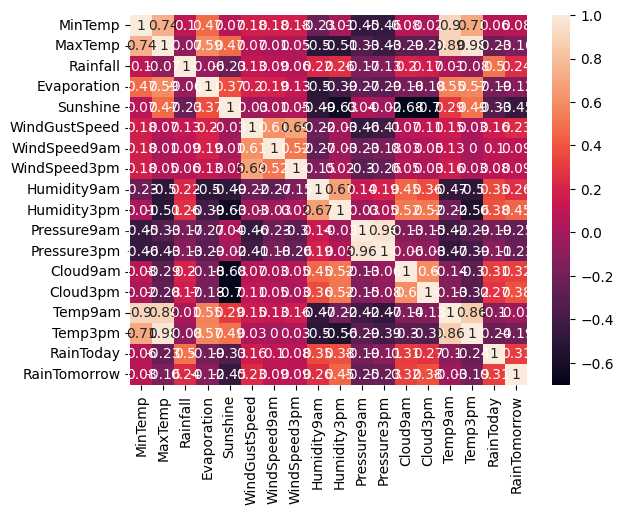

In [10]:
#We can visualize this correlation matrix
import seaborn as sns
sns.heatmap(cor_matrix, annot = True)

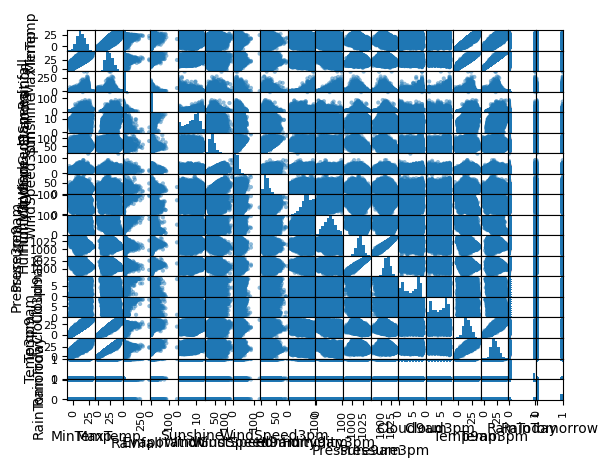

In [11]:
#Another visualization of how each of attribute affect others
from pandas.plotting import scatter_matrix
scatter_matrix(rain_df)
plt.show()

3) VISUALIZATION OF DATASET

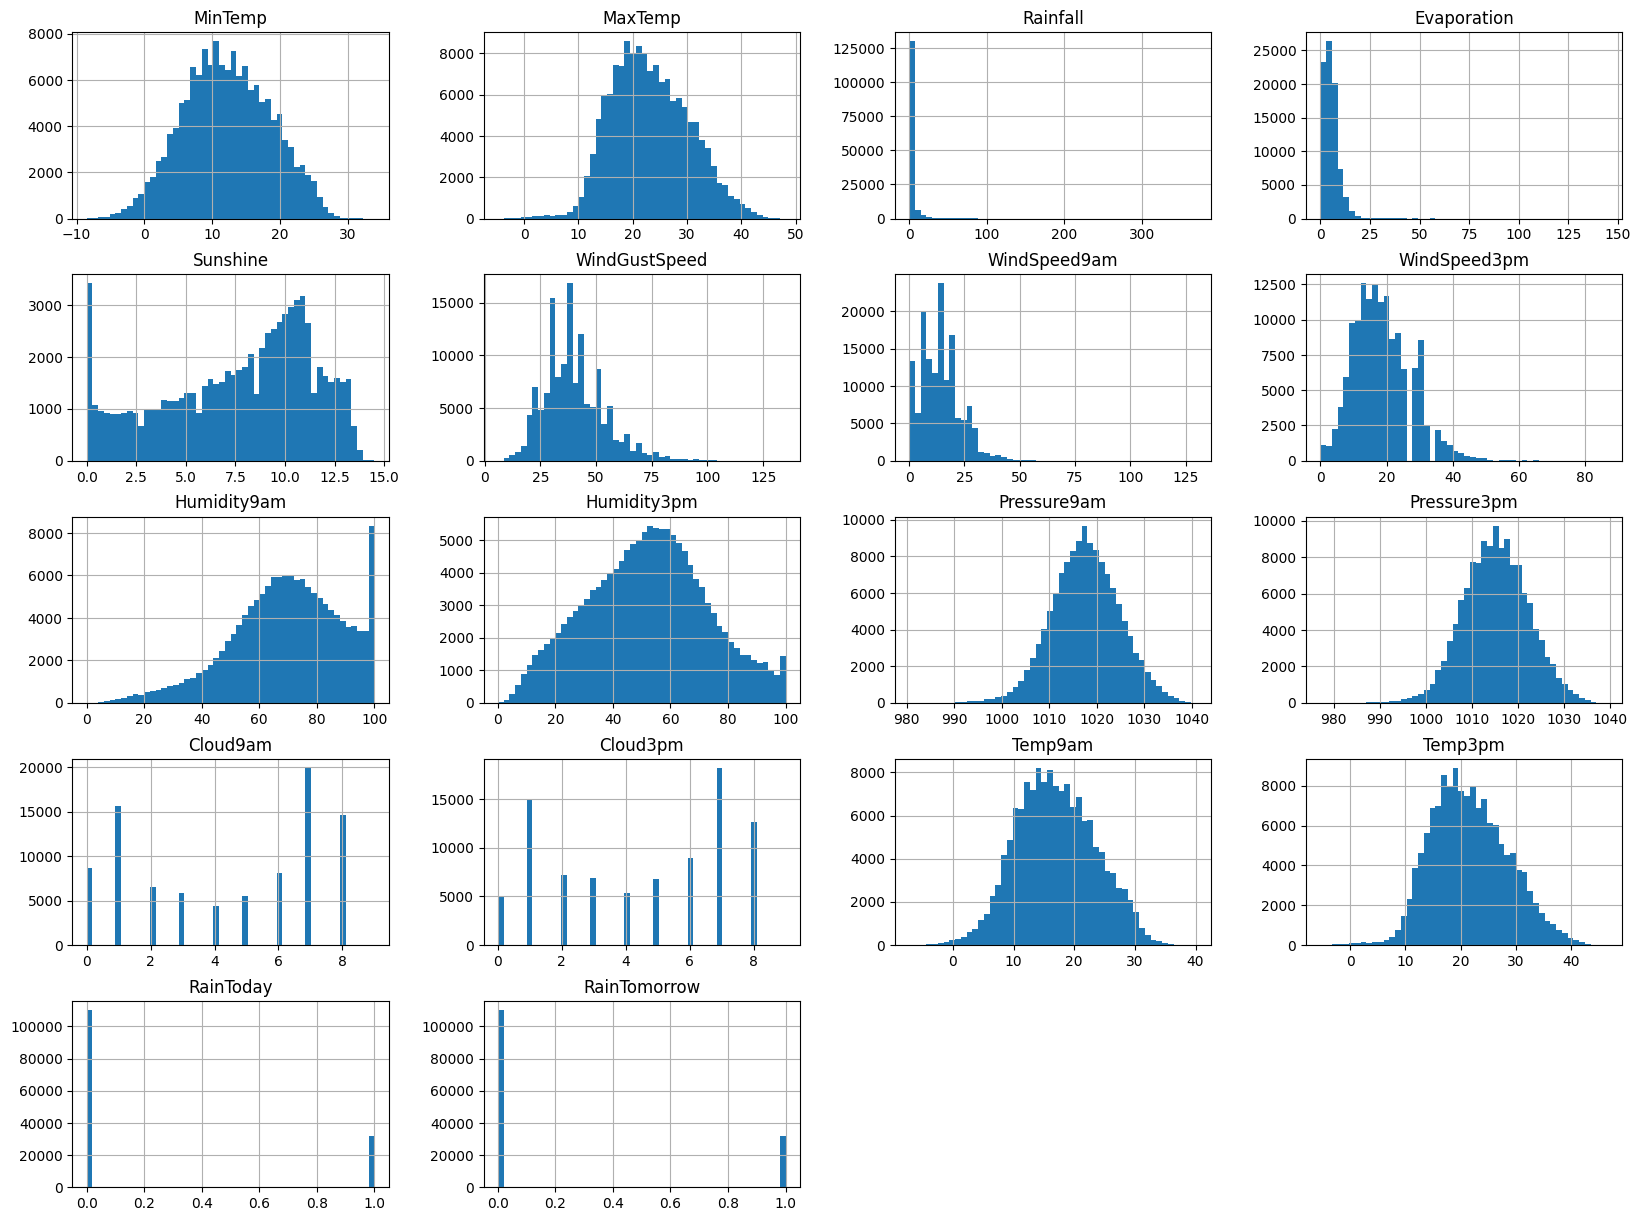

In [12]:
#Histogram of each attribute
import matplotlib.pyplot as plt
rain_df.hist(bins=50, figsize=(20, 15))
plt.show()

According to those histograms, we can see attributes: BMI, Blood Pressure, Diabetes Pedigree Function and skin thickness have a quite normal distribution

However, more importantly, the regconition of some attribute has null ('0') values, which is impossible in term of its indexes and might affect the analysis in future, such as: skin thickness, insulin, glucose, blood pressure... So we have to processed those data for better understanding

# II) DATA CLEANING AND TRANSFORMATION

1) DEALING WITH MISSING VALUES

We will divide dataset into 2 parts (Categorical and Numerical)

Dealing with Categorical Missing Values

In [13]:
# Get list of categorical variables
s = (rain_df.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [14]:
# Missing values in categorical variables

for i in object_cols:
    print(i, rain_df[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228


In [15]:
# Filling missing values with mode of the column in value

for i in object_cols:
    rain_df[i].fillna(rain_df[i].mode()[0], inplace=True)

Dealing with Numerical Missing Values
* Filling missing values with median of the column value

In [16]:
# Get list of neumeric variables
t = (rain_df.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [17]:
# Missing values in numeric variables

for i in num_cols:
    print(i, rain_df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
RainToday 3261
RainTomorrow 3267


In [18]:
# Filling missing values with median of the column in value

for i in num_cols:
    rain_df[i].fillna(rain_df[i].median(), inplace=True)
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

2) Label encoding the catagorical varable

In [19]:
# Apply label encoder to each column with categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in object_cols:
    rain_df[i] = label_encoder.fit_transform(rain_df[i])
    
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  int64  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int64  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int64  
 10  WindDir3pm     145460 non-null  int64  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

3) Feature Scaling

In [20]:
# Prepairing attributes of scale data
from sklearn import preprocessing

features = rain_df.drop(['RainTomorrow', 'Date'], axis=1) # dropping target and extra columns

target = rain_df['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


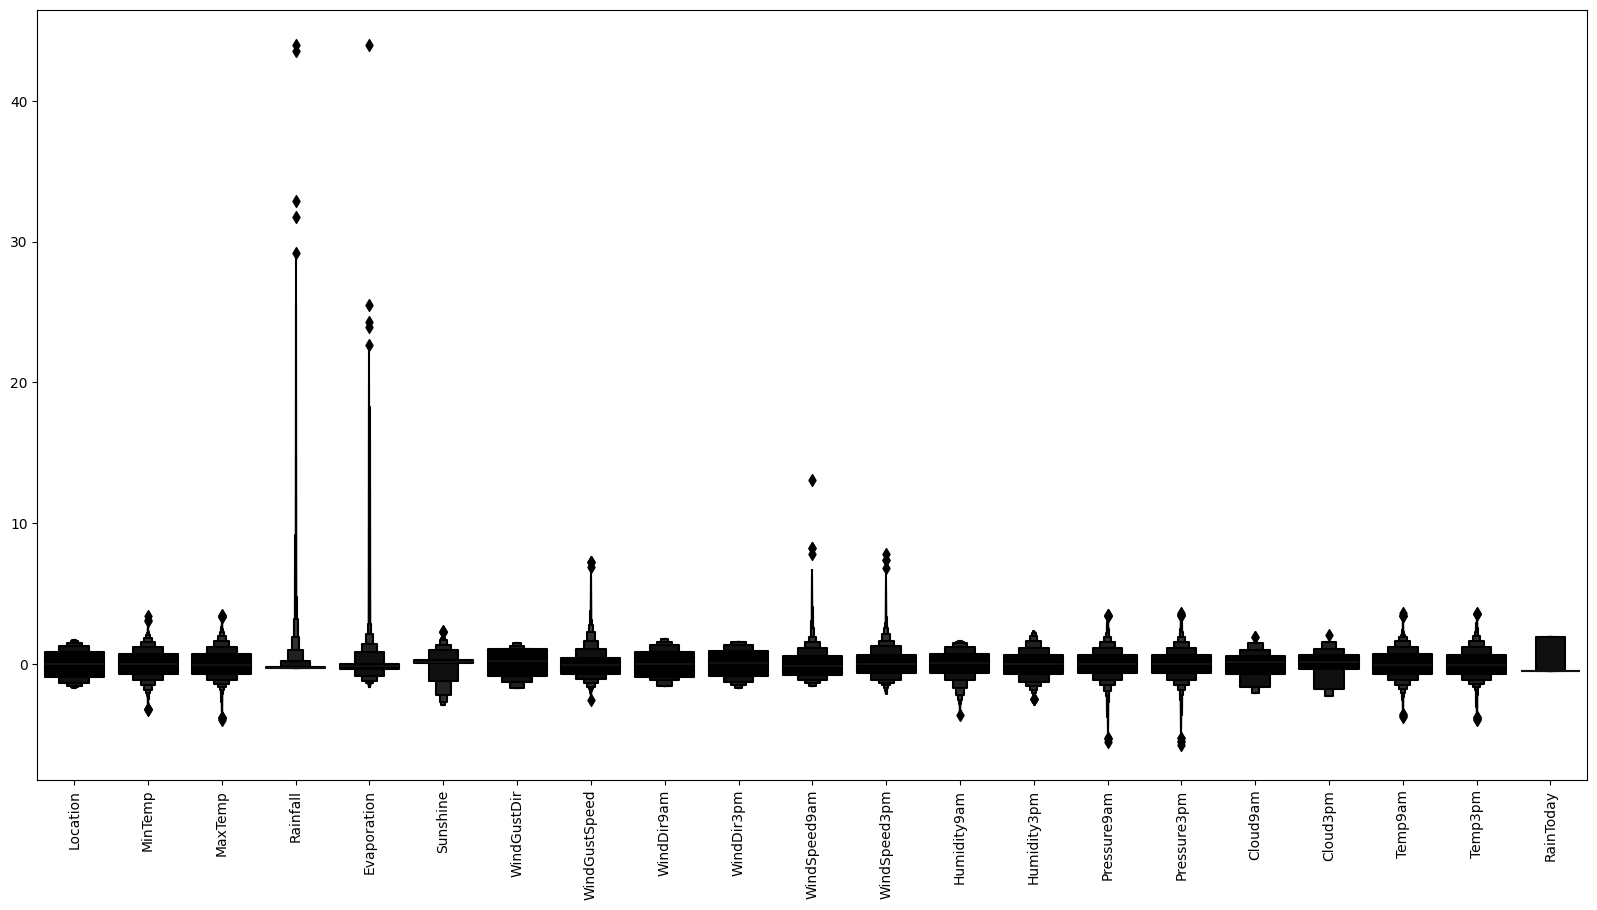

In [21]:
#Detecting outliers
#looking at the scaled features
colours = ["#000000"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [22]:
#full data for 
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127536, 22)

In [23]:
rain_df = features

In [24]:
rain_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,1.045228,0.307739,1.328766,1.366458,...,0.111308,-1.443652,-1.478015,-1.223012,1.464068,0.137693,-0.013506,0.019135,-0.529795,0.0
1,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.258262,0.307739,-0.221338,1.586813,...,-1.320650,-1.297105,-1.047010,-1.117969,0.149133,0.137693,0.033011,0.384064,-0.529795,0.0
2,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.471296,0.460168,1.328766,1.586813,...,-1.638863,-1.052860,-1.492877,-0.982915,0.149133,-1.286294,0.622225,0.223495,-0.529795,0.0
3,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.872075,-1.216548,0.442992,-1.718521,...,-1.267615,-1.736746,-0.006653,-0.367666,0.149133,0.137693,0.172562,0.705202,-0.529795,0.0
4,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,1.045228,0.079096,-1.328556,-0.176032,...,0.694699,-0.906314,-1.017286,-1.388078,1.025756,1.561680,0.126045,1.172312,-0.529795,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.209285,-1.475402,0.025964,-0.275097,-0.119472,0.14871,-1.724209,-0.683048,0.442992,-1.498165,...,-0.949402,-1.345954,1.033703,0.757789,0.149133,0.137693,-1.067887,0.106718,-0.529795,0.0
145456,1.209285,-1.349730,0.294010,-0.275097,-0.119472,0.14871,-0.446007,-1.368977,0.442992,-1.057454,...,-0.684224,-1.492501,0.870219,0.577716,0.149133,0.137693,-0.943842,0.413259,-0.529795,0.0
145457,1.209285,-1.066967,0.519733,-0.275097,-0.119472,0.14871,-1.085108,-0.225761,0.442992,1.366458,...,-0.843331,-1.345954,0.498663,0.232577,0.149133,0.137693,-0.695753,0.646814,-0.529795,0.0
145458,1.209285,-0.689950,0.533840,-0.275097,-0.119472,0.14871,0.193094,-0.911691,0.664436,-1.057454,...,-0.949402,-1.345954,0.260867,0.187559,-0.727490,-1.286294,-0.292607,0.632217,-0.529795,0.0


As the result, there are only 127536 attribute vectors left, there are 17924 datapoints that do not meet standards, are classified as extreme outliers and removed from the  dataset (12.3% reduction)

In order to avoid miss-indexing, we have to reset index of new dataset

In [25]:
#Create an index array
index=pd.Index([i for i in range(127536)])
#Reset the index of dataframe
rain_df.index=index

In [26]:
#Check the dataset reset 
rain_df.shape

(127536, 22)

3) FEATURE SCALING

Look back to the statistical description of dataframe

In [27]:
rain_stats=rain_df.describe().round(decimals=2)
rain_stats

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,127536.00,127536.00,127536.00,127536.00,127536.00,127536.00,127536.00,127536.00,127536.00,127536.00,...,127536.00,127536.00,127536.00,127536.00,127536.00,127536.00,127536.00,127536.00,127536.00,127536.00
mean,0.00,0.03,0.01,-0.07,-0.08,0.00,-0.00,-0.06,0.01,-0.01,...,0.02,0.01,-0.01,-0.01,0.00,-0.00,0.02,0.02,-0.01,0.21
std,1.00,0.93,0.89,0.58,0.71,0.99,1.00,0.89,1.00,1.00,...,0.93,0.96,0.86,0.86,0.99,1.00,0.90,0.89,0.99,0.41
min,-1.67,-2.29,-1.99,-0.28,-1.63,-2.90,-1.72,-2.51,-1.55,-1.72,...,-2.96,-2.18,-2.70,-2.69,-2.04,-2.24,-2.00,-2.00,-0.53,0.00
25%,-0.90,-0.66,-0.67,-0.28,-0.37,0.08,-0.87,-0.68,-0.89,-0.84,...,-0.58,-0.66,-0.56,-0.56,-0.73,-0.34,-0.66,-0.65,-0.53,0.00
50%,0.01,-0.03,-0.06,-0.28,-0.12,0.15,0.19,-0.07,0.00,0.04,...,0.06,0.02,-0.01,-0.01,0.15,0.14,-0.04,-0.08,-0.53,0.00
75%,0.86,0.69,0.67,-0.20,0.01,0.29,1.05,0.46,0.89,0.93,...,0.69,0.66,0.57,0.58,0.59,0.61,0.67,0.65,-0.53,0.00
max,1.70,2.29,2.30,4.49,2.77,2.07,1.47,3.89,1.77,1.59,...,1.65,2.37,2.00,1.99,1.46,1.56,2.30,2.30,1.89,1.00


It's obvious that whereas some features have remarkably higher range as: insulin, glucose,... compared to pregnancies are just ranging from 0 to 13. This difference might affect classification depends on distance such as KNeighbor. Moreover, some learning algorithms don't work very well if the features have a different set of values. For this reason we need to apply a proper scaling system.

The scaling system we choose here is Standardization

In [28]:
#Normalize data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler as Scaler

scaler = Scaler()
rain_scaled = scaler.fit_transform(rain_df)[:,:-1]

In [29]:
#Scaled values become a 2D array
rain_scaled

array([[-1.53978856,  0.17653042, -0.06679027, ..., -0.04000688,
         0.00408504, -0.52179343],
       [-1.53978856, -0.83773939,  0.28121852, ...,  0.01166791,
         0.41251249, -0.52179343],
       [-1.53978856,  0.09200794,  0.37613   , ...,  0.66621527,
         0.23280441, -0.52179343],
       ...,
       [ 1.21214402, -1.17582933,  0.56595297, ..., -0.79790381,
         0.70658025, -0.52179343],
       [ 1.21214402, -0.7701214 ,  0.58177156, ..., -0.35005562,
         0.69024315, -0.52179343],
       [ 1.21214402,  0.43009787, -0.11424601, ..., -0.36728055,
        -0.14294884, -0.52179343]])

In [30]:
#Return this 2D array back to dataframe, however the 'outcome' column is removed
rain_scaled_df = pd.DataFrame(rain_scaled)

In [31]:
#Add the target column(outcome)
rain_scaled_df['RainTomorrow']=rain_df['RainTomorrow']

In [32]:
#Return the original names of these columns
rain_scaled_df.columns=rain_df.columns

In [33]:
#DataFrame showing
rain_scaled_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.539789,0.176530,-0.066790,-0.236901,-0.060582,0.148063,1.043941,0.414944,1.320146,1.376092,...,0.103203,-1.518133,-1.704581,-1.408094,1.468218,0.141153,-0.040007,0.004085,-0.521793,0.0
1,-1.539789,-0.837739,0.281219,-0.360591,-0.060582,0.148063,1.256615,0.414944,-0.229861,1.596211,...,-1.432748,-1.364832,-1.205674,-1.286591,0.146299,0.141153,0.011668,0.412512,-0.521793,0.0
2,-1.539789,0.092008,0.376130,-0.360591,-0.060582,0.148063,1.469288,0.585778,1.320146,1.596211,...,-1.774070,-1.109330,-1.721784,-1.130373,0.146299,-1.285131,0.666215,0.232804,-0.521793,0.0
3,-1.539789,-0.533458,0.739957,-0.360591,-0.060582,0.148063,-0.870119,-1.293401,0.434428,-1.705573,...,-1.375861,-1.824736,-0.001416,-0.418712,0.146299,0.141153,0.166692,0.771929,-0.521793,0.0
4,-1.539789,0.869615,1.420156,-0.154441,-0.060582,0.148063,1.043941,0.158692,-1.337008,-0.164741,...,0.728960,-0.956029,-1.171266,-1.599028,1.027579,1.567437,0.115017,1.294716,-0.521793,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127531,1.212144,-1.615346,0.012303,-0.360591,-0.060582,0.148063,-1.720812,-0.695480,0.434428,-1.485454,...,-1.034538,-1.415933,1.202842,0.883107,0.146299,0.141153,-1.211302,0.102108,-0.521793,0.0
127532,1.212144,-1.480110,0.312856,-0.360591,-0.060582,0.148063,-0.444772,-1.464236,0.434428,-1.045216,...,-0.750103,-1.569234,1.013602,0.674816,0.146299,0.141153,-1.073503,0.445187,-0.521793,0.0
127533,1.212144,-1.175829,0.565953,-0.360591,-0.060582,0.148063,-1.082792,-0.182977,0.434428,1.376092,...,-0.920764,-1.415933,0.583510,0.275592,0.146299,0.141153,-0.797904,0.706580,-0.521793,0.0
127534,1.212144,-0.770121,0.581772,-0.360591,-0.060582,0.148063,0.193248,-0.951732,0.655857,-1.045216,...,-1.034538,-1.415933,0.308251,0.223519,-0.734980,-1.285131,-0.350056,0.690243,-0.521793,0.0


In [34]:
#The following code checks whether any instances in 'Outcome' attribute is NaN caused by miss-indexing
rain_scaled_df.RainTomorrow.isnull().any()

False

As we can see now all the attributes (except the target column) are successfully standardized (ranging from -1 to 1)

# III) TESTING MULTIPLE MODELS

In [35]:
features = rain_df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = rain_df['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [37]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken


1) LOGISTIC REGRESSION

In this case, we want to split the it into to train and test set with ratio 0.75 : 0.25, respectively

Accuracy = 0.8448438088069251
ROC Area under Curve = 0.7073383921184122
Cohen's Kappa = 0.47361548220060434
Time taken = 0.6638212203979492
              precision    recall  f1-score   support

         0.0    0.86704   0.94791   0.90567     25054
         1.0    0.70955   0.46676   0.56310      6830

    accuracy                        0.84484     31884
   macro avg    0.78829   0.70734   0.73439     31884
weighted avg    0.83330   0.84484   0.83229     31884



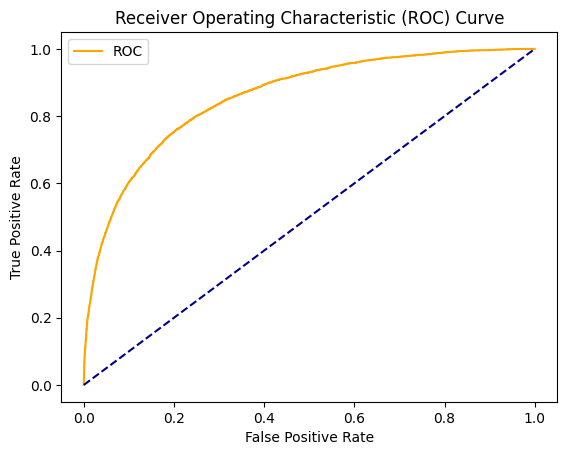

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


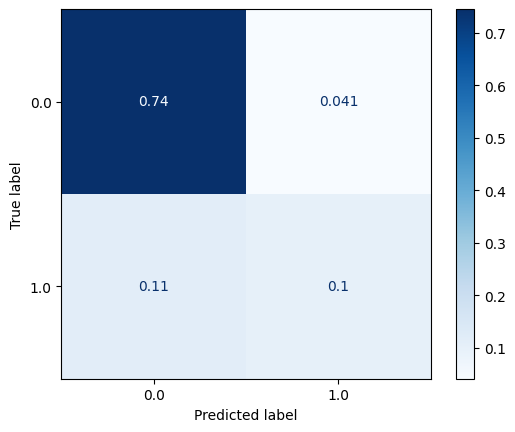

In [38]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

2) Decision tree

Accuracy = 0.812915568937398
ROC Area under Curve = 0.6787153452787952
Cohen's Kappa = 0.39142604855427154
Time taken = 0.21130704879760742
              precision    recall  f1-score   support

         0.0    0.85767   0.91351   0.88471     25054
         1.0    0.58319   0.44392   0.50412      6830

    accuracy                        0.81292     31884
   macro avg    0.72043   0.67872   0.69441     31884
weighted avg    0.79887   0.81292   0.80318     31884



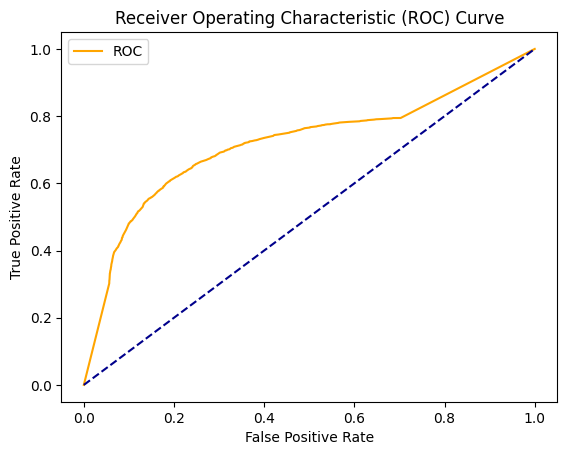

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


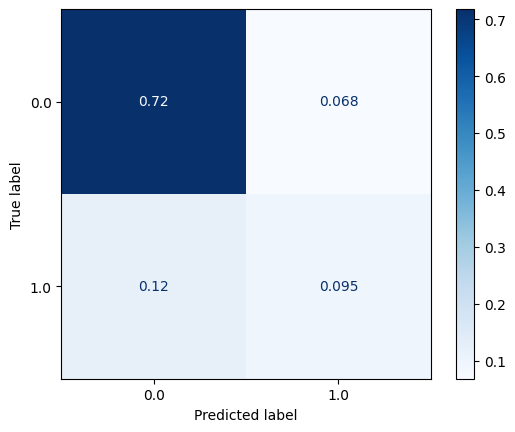

In [39]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

3) Neural Network

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy = 0.8542215531300966
ROC Area under Curve = 0.7293868669734866
Cohen's Kappa = 0.5144374526894042
Time taken = 87.55198907852173
              precision    recall  f1-score   support

         0.0    0.87669   0.94779   0.91086     25054
         1.0    0.72739   0.51098   0.60028      6830

    accuracy                        0.85422     31884
   macro avg    0.80204   0.72939   0.75557     31884
weighted avg    0.84471   0.85422   0.84432     31884



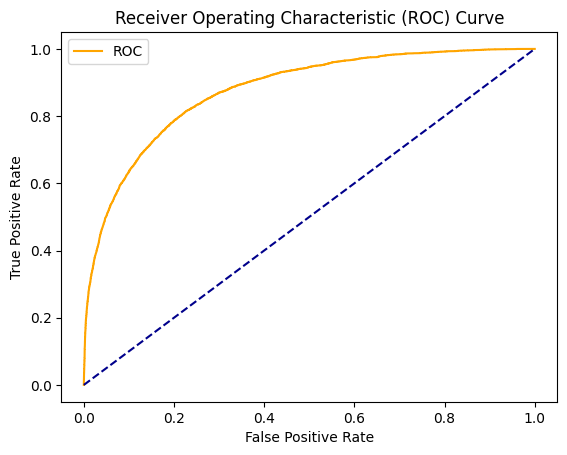

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


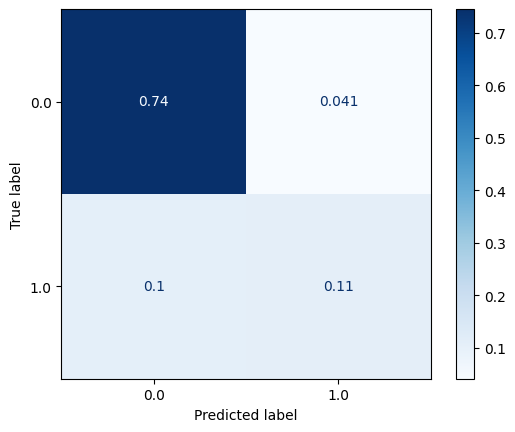

In [41]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

2) BUILDING AND TESTING MODELS

Right now, we didnot know which model is the best for our classification, we train and test each of them

To avoid overfitting, we split the dataset into many different folds for training and testing

In [36]:
#Import all the learning algorithms we want to test
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [37]:
#Import some utilities of sklearn to compare algorithms
from sklearn import  model_selection
from sklearn.metrics import classification_report #Reporting metric
from sklearn.metrics import confusion_matrix #Confusion_matrix Reporting
from sklearn.metrics import accuracy_score #Accuracy calculating

In [38]:
# Prepare the configuration to run the test
results=[]
names=[]
seed=7

In [39]:
# Prepare an array with all the algorithms
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('CARD',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [40]:
#Evaluate each model in turn
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed, shuffle=True)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

LR:1.000000(0.000000)
CARD:1.000000(0.000000)
KNN:0.938266(0.002947)
LDA:0.842429(0.003946)
NB:1.000000(0.000000)
SVM:1.000000(0.000000)


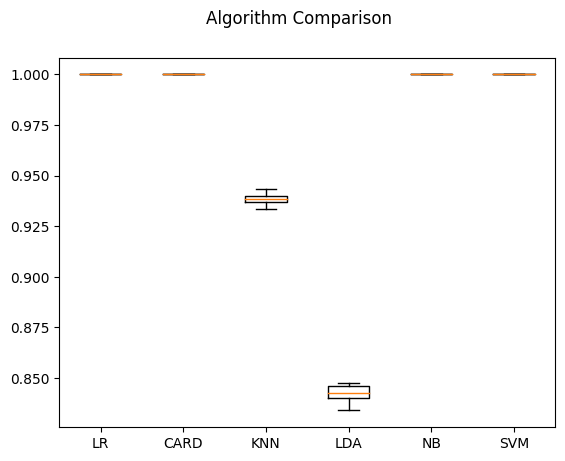

In [41]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

It looks like that using this comparison method, the most performant algorithm is Logistic Regression and Linear Discriminant Analysis, those 2 are likely to have equal efficiency (81% vs 80%)

ROC CURVE FOR COMPARISON

In [42]:
#Define x and y axis
x = rain_scaled_df.drop(axis = 'columns', columns = 'RainTomorrow')
y_true = np.array(rain_scaled_df['RainTomorrow'])

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y_true)
y_score_lr = cross_val_predict(lr, x, y_true, method='decision_function',cv=10)

fpr, tpr, threshold = roc_curve(y_true,y_score_lr)

# GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnbc = GaussianNB()
gnbc.fit(x,y_true)
gnbc_results = cross_val_score(gnbc,x,y_true,scoring='accuracy')
y_score_gnb = cross_val_predict(gnbc,x,y_true,method='predict_proba',cv=10)
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y_true,y_score_gnb[:,1])

# K Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(x,y_true)
knc_results = cross_val_score(knc,x,y_true,scoring='accuracy')
y_score_knn = cross_val_predict(knc,x,y_true,method='predict_proba',cv=10)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_true,y_score_knn[:,1])

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x,y_true)
lda_results = cross_val_score(lda,x,y_true,scoring='accuracy')
y_score_lda = cross_val_predict(lda,x,y_true,method='predict_proba',cv=10)
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_true,y_score_lda[:,1])

# SVC
from sklearn.svm import SVC
svc = SVC(probability = True)
svc.fit(x,y_true)
svc_results = cross_val_score(svc,x,y_true,scoring='accuracy')
y_score_svc = cross_val_predict(svc,x,y_true,method='predict_proba',cv=10)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_true,y_score_svc[:,1])

# ROC Curve for the models above
plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr_gnb, tpr_gnb,label='Gaussian NB')
plt.plot(fpr_knn, tpr_knn,label='KNN')
plt.plot(fpr_lda, tpr_lda,label='LDA')
plt.plot(fpr_svc, tpr_svc,label='SVC')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(10, 6))
plt.show()
plt.show

In [ ]:
from sklearn.metrics import roc_auc_score
print ('AUC of Logistic Regression:',roc_auc_score(y_true,y_score_lr))
print ('AUC of GaussianNB:',roc_auc_score(y_true,y_score_gnb[:,1]))
print ('AUC of KNeighborsClassifier:',roc_auc_score(y_true,y_score_knn[:,1]))
print ('AUC of Linear Discriminant Analysis:',roc_auc_score(y_true,y_score_lda[:,1]))
print ('AUC of Support Vector Machine:',roc_auc_score(y_true,y_score_svc[:,1]))

It looks like that using this comparison method, the most performant algorithm is Logistic Regression and Linear Discriminant Analysis, those 2 are likely to have equal efficiency (82.8% vs 83.9%)

# IV) BUILDING THE BEST MODEL FOR PREDICTION

1) ANALYSIS OF 2 MODELS: LOGISTIC REGRESSION AND LINEAR DISCRIMINANT ANALYSIS

The following confusion matrices and classification reports will give you a brief overview of th 2 most effective models 

**** CONFUSION MATRIX ****

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
predictions1=lr.predict(X_test)
cm1=confusion_matrix(Y_test,predictions1)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test,predictions1).ravel()
print('True Positive:', tp,';',
      'False Positive:', fp,';',
      'True Negative:', tn,';',
      'False Negative', fn)

In [ ]:
#Linear Discriminant Analysis
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
predictions2=lda.predict(X_test)
cm2=confusion_matrix(Y_test,predictions2)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm2, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test,predictions2).ravel()
print('True Positive:', tp,';',
      'False Positive:', fp,';',
      'True Negative:', tn,';',
      'False Negative', fn)

**** CLASSIFICATION REPORT ****

In [ ]:
from sklearn.metrics import confusion_matrix
#Logistic Regression
print(classification_report(Y_test,predictions1))

In [ ]:
#Linear Discriminant Analysis
print(classification_report(Y_test,predictions2))

2) FINDING THE BEST MODEL BY GRIDSEARCH

# A- Linear Discriminant Analysis

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid1 = {
    'solver': ['svd', 'lsqr', 'eigen']
}

model_lda= LinearDiscriminantAnalysis()

grid_search1 = GridSearchCV(
    model_lda, param_grid1, cv=10, scoring='accuracy')
grid_search1.fit(X_train, Y_train)

The parameter above is the best parameter for LinearDiscriminantAnalysis model, we will use it the build the model

In [ ]:
# Print the bext score found
grid_search1.best_score_

# B-Logistic Regression

a) Penalty testing - advoid overfitting

In [ ]:
#RIDGE REGRESSION (L2 PENALTY)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters= {'alpha':[2,4,6,8,10]}
ridge_reg=GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error',cv=10)
ridge_reg.fit(X_train,Y_train)
print("The best parameter is:",ridge_reg.best_params_)
print("The best score for this penalty is",ridge_reg.best_score_)

In [ ]:
#LASSO REGRESSION (L1 PENALTY)
from sklearn.linear_model import Lasso

parameters= {'alpha':[2,4,6,8,10]}

lasso=Lasso()
lasso_reg=GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)
lasso_reg.fit(X_train,Y_train)
print("The best parameter is:",lasso_reg.best_params_)
print('The best score for this penalty is: ',lasso_reg.best_score_)

The above testing points out that the L2 penalty with alpha=10 would be more effective for our model (-0.22<-0.15)

b) Best parameter for Logistic Regression

In [ ]:
param_grid2 = {
    'penalty':['l2'],
    'C':[1.0,10.0,50.0],
    'solver':['newton-cg', 'lbfgs', 'liblinear']
}

model_lr= LogisticRegression()

grid_search2 = GridSearchCV(
    model_lr, param_grid2, cv=10, scoring='accuracy')
grid_search2.fit(X_train, Y_train)
print("The best score for this model is",grid_search2.best_score_)

Since 2 models: Linear Discriminant Analysis and Logistic Regression with optimized parameter have the same best accuracy score, we can build either one of them for our prediction

3) APPLY THE BEST PARAMETERS TO THE MODEL AND TRAIN IT

We choose Logistic Regression with L2 penalty and compatable parameter computed above

In [ ]:
# Create an instance of the algorithm using parameters
# from best_estimator_ property
lr = grid_search2.best_estimator_

In [81]:
# Use the whole dataset to train the model
X = np.append(X_train, X_test, axis=0)
Y = np.append(Y_train, Y_test, axis=0)

In [82]:
# Train the model
lr.fit(X, Y)

LogisticRegression(solver='newton-cg')

4) MODIFY THE THRESHOLD

In [83]:
#Define a function to optimize the threshold
def optimize_threshold(model):
    bestthresh = []
    for i in range(1,101):
        threshold = i/100
        pred = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
        tn, fp, fn, tp = confusion_matrix(Y_test, pred).ravel()
        recall = tp / (tp + fn)
        precision = tp / (tp + fp)
        f1 = (2*recall*precision)/(recall+precision)
        if recall>=0.9 and f1>=0.7:
            bestthresh.append(threshold)
    return bestthresh

This function will return a list of best thresholds for our model. We want to obtain only threshold with recall>=0.9 and f1>=0.7, which can not only maximize the recall, minimize the False Negative problem, but also balance the interrelation between recall and precision

In [84]:
print('Logistic Regression')
optimize_threshold(lr)

Logistic Regression


C:\Users\Thai\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Thai\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Thai\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Thai\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Thai\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Thai\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature nam

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99]

In [136]:
print('Linear Discriminant Analysis')
optimize_threshold(lda)

Linear Discriminant Analysis


C:\Users\Thai\AppData\Local\Temp\ipykernel_31352\2806205356.py:9: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)


[]

Now we just focus on ist of best threholds for Logistic Regression:[0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3]
From the list, we can see optimized thresholds are ranging from 0.22 to 0.3, we pick the median/mean one, which is 0.26 for our model. Then if the probability belongs to '1' class is larger than 0.26, then a person is predicted to be positive with Type II diabete.

# V) MAKE PREDICTIONS

In [131]:
# We create a new (fake) person infomation
new_data = pd.DataFrame([np.random.uniform(0,1,len(rain_scaled_df.columns))])
# We scale those values like the others
new_data_scaled = scaler.transform(new_data)

C:\Users\Thai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [132]:
# We modify the threshold
prediction = lr.predict_proba(new_data_scaled)[:,1]

In [133]:
# A value of "1" means that this person is likely to have type 2 diabetes
if prediction > 0.26:
    print("The person is positive with Type II diabetes")
else:
    print("The person is negative with Type II diabetes")

The person is positive with Type II diabetes


Prediction points out that this red with information:(3, 120, 72, 10, 200, 30, 30,0.4) (Pregnancy= 3 times, Glucose level= 120mg/dL, BloodPressure= 72mmHg, SkinThickness =10mm, Insulin level= 200mIU/L, BMI= 30, Age= 30 years, DiabetesPedigreeFunction= 0.4) is diagnosed 'negative' towards type II diabetes

In [134]:
#Define a function using the logic above for quicker and more convenient prediction:
def prediction(data):
    data_scaled=scaler.transform(data)
    predict=lr.predict_proba(data_scaled)[:,1]
    if predict > 0.26:
        print("The person is positive with Type II diabetes")
    else:
        print("The person is negative with Type II diabetes")

**** Warning: The data passed in the function defined has to be a dataframe****

Let's check again with data of another person, using our function:

In [135]:
data= pd.DataFrame([np.random.uniform(0,1,len(rain_scaled_df.columns))])
prediction(data)

The person is positive with Type II diabetes


C:\Users\Thai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Our prediction model points out that this red with information: (6, 168, 72, 35, 0, 43.6, 0.627, 65) (Pregnancy= 6 times, Glucose level= 168mg/dL, BloodPressure= 72mmHg, SkinThickness =35mm, Insulin level= 0mIU/L, BMI= 43.6, Age= 65 years, DiabetesPedigreeFunction= 0.627) is diagnosed 'negative' towards type II diabetes

# VI) CONCLUSION

We finally find a score of 80.3% using Logistic Regression algorithm with Ridge Penalty and parameters optimisation. Please note that there may be still space for further analysis and optimisation. Training a machine learning model to solve a problem with a specific dataset is a test/fail/improve process. And according to our knowledge in Data Science subject until now, this is the best model achieved.

# ACKNOWLEDGEMENT

During project, there are a lot of things we were not clear about or having trouble dealing with machine learning techniques. Therefore, we want to express a huge gratefulness to listed but not limited sources that contribute to our success:

1) https://towardsdatascience.com

2) https://scikit-learn.org

3) https://pandas.pydata.org

4) https://www.datacamp.com

As well as many discussion forums, topics,... that give us a helping hand when encoutering many difficulties during this study.

# Special thank to our Data Science subject professor, Aditya Narvekar for the entirely amazing semester!!!